In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Define data pre processing pipline

In [2]:
def data_pipline(data):
    '''
    Argument:
        data {pandas DataFrame}-- raw dataset

    Returns:
        data {pandas DataFrame}-- drop CHMON, reindex and rename alarms
    '''

    # drop CHMON
    data = data[data['meta_facility'] != 'CHMON']
    data = data.drop_duplicates(subset=['meta_nhpId', 'pk_timestamp'], keep='first')
    data = data.set_index(['meta_nhpId', 'pk_timestamp']).sort_index().reset_index()
    data.category = data.category.str.replace(" unplanned", '')
    return data

### Define ploting function

In [3]:
def plot_per_device(data, device_id, date_range=pd.date_range('20181118', end='20190318', freq='D')):
    '''
    Argument:
        data {pandas DataFrame}-- preprocessed dataset
        device_id {String}-- meta_nhpId, e.g. 'Node1055:OPTMON-2-9-13:NTK554TA'
        date_range {DatetimeIndex}-- the x-axis date range
    '''
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['figure.dpi'] = 200

    # get data by device id
    per_device = data[data.meta_nhpId == device_id]
    per_device = per_device.set_index('pk_timestamp')
    per_device.index = pd.to_datetime(per_device.index)

    # get meta facility
    device_type = per_device['meta_facility'].values[0]

    # get anomaly indexes
    anomaly = per_device.loc[per_device['category'].notna()]
    anomaly_index_list = anomaly.index.tolist()

    # get out of sevice indexes
    oos = per_device[~per_device['meta_status'].isin(['IS'])]
    oos_index_list = oos.index.tolist()

    # drop all zero columns and reindex the data for the sake of plotting
    per_device = per_device.dropna('columns', 'all')
    days = date_range
    per_device = per_device.reindex(days)

    # print anomalies and the occurrence time
    print('-------------------- Anomalies --------------------')
    if anomaly.empty:
        print('No anomaly instance found')
    else:
        print(anomaly['category'])

    # print oos
    print('----------------- Out of service ------------------')
    if oos.empty:
        print('No out-of-service instance found')
    else:
        print(oos['meta_status'])

    plt.figure()
    # create a subplot for each PM value
    axes = per_device.plot(subplots=True, grid=True, marker='o', markersize=2)
    # plot anomalies
    for ax in axes:
        ax.legend(loc=2, prop={'size': 5})
        for vline in anomaly_index_list:
            ax.axvline(vline, color='r', lw=1, ls='dashed', label='anomaly')
            # print(anomaly.loc[vline, ['TIME', 'category']])
    # mark out of service cases

    for ax in axes:
        for dot in oos_index_list:
            ax.axvspan(dot - pd.Timedelta(days=1), dot, facecolor='#2ca02c', alpha=0.5)

    plt.xlabel('ID: ' + device_id + '   Device Type: ' + device_type)

    plt.show()

### Load data

In [4]:
data = pd.read_parquet(
    '/Users/sunjincheng/Desktop/Hackathon/data/hackathon/colt_london_1DAY_tkPMs_pivoted_processed_anonymized.parquet')

data = data_pipline(data)

anomalies = data.loc[data['category'].notna()]

alarm_device_list = anomalies.meta_nhpId.unique()


### Plot


-------------------- Anomalies --------------------
pk_timestamp
2019-02-19    remote fault
Name: category, dtype: object
----------------- Out of service ------------------
No out-of-service instance found


<Figure size 2000x1600 with 0 Axes>

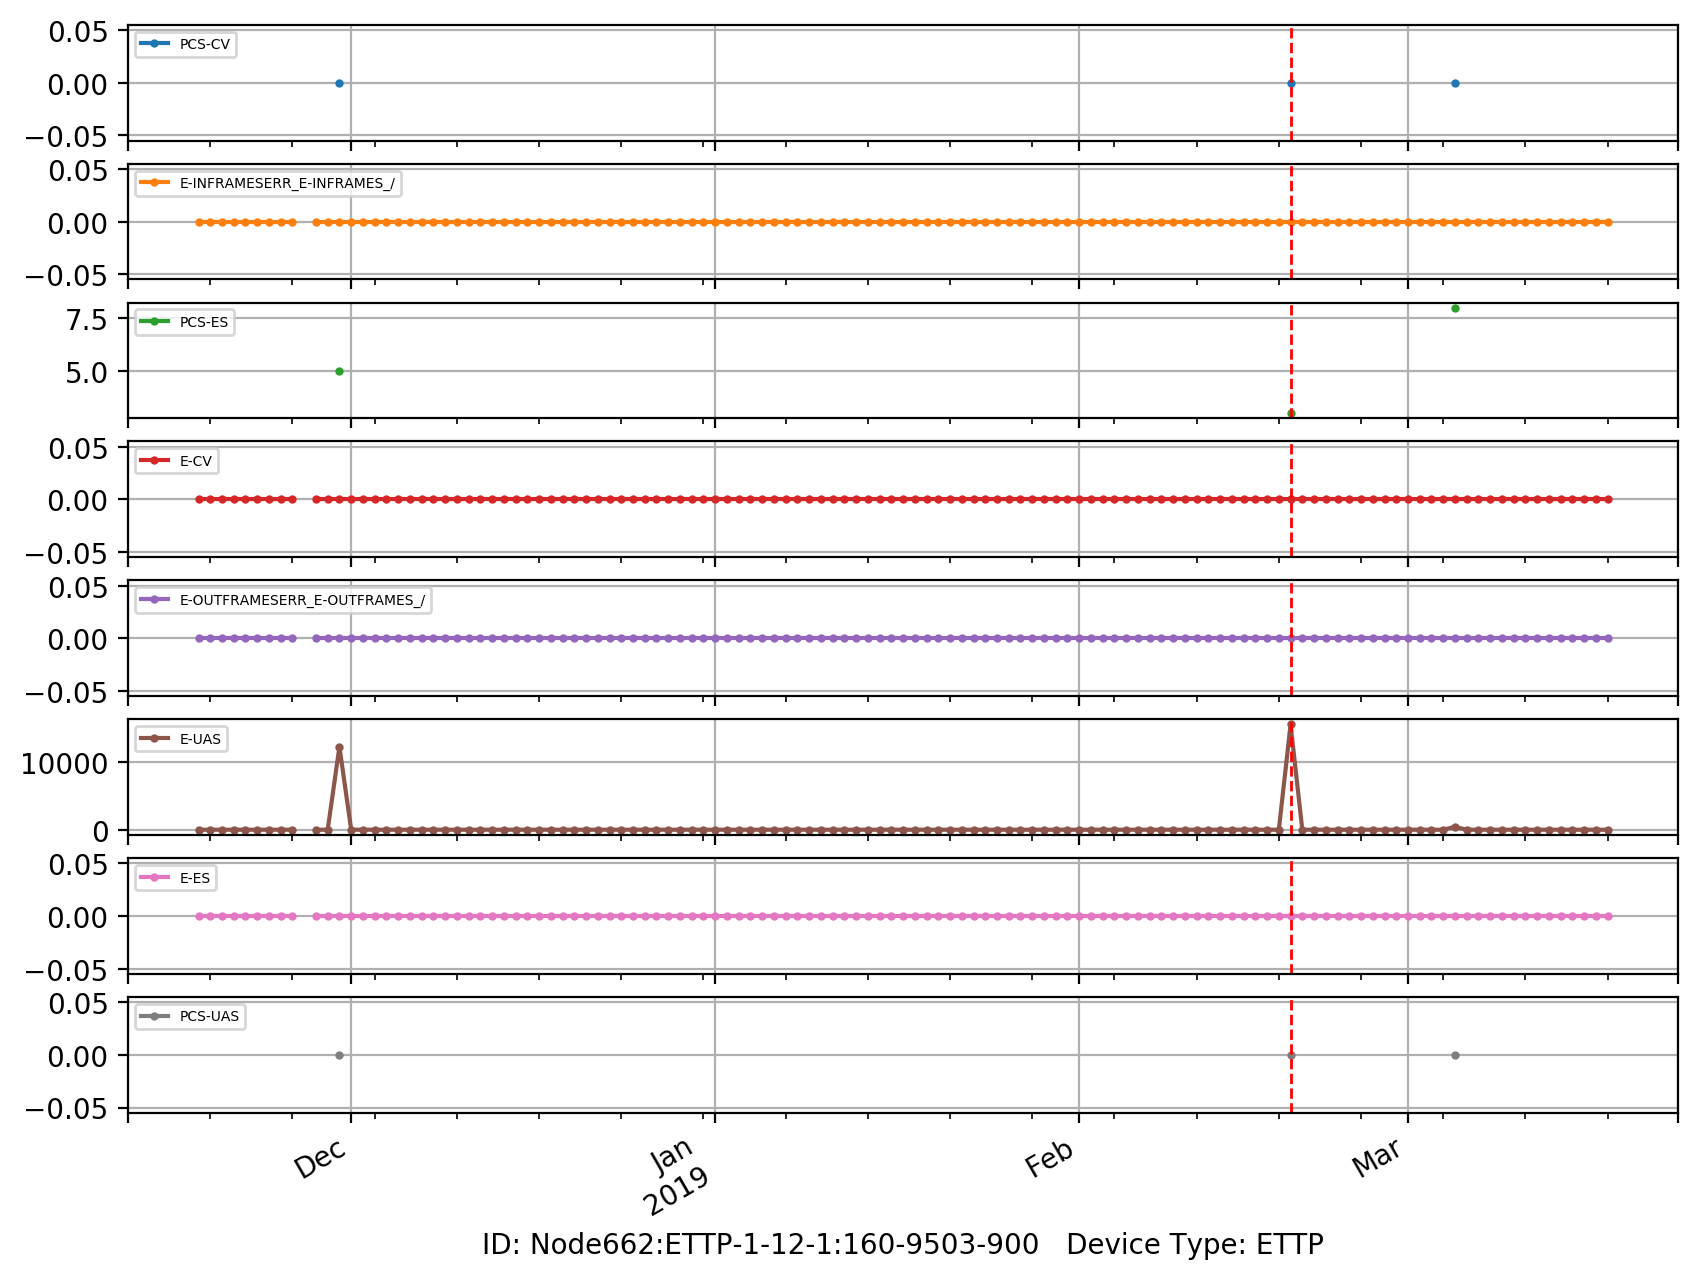

In [5]:
# example 1
plot_per_device(data, alarm_device_list[1010])

-------------------- Anomalies --------------------
pk_timestamp
2019-01-18    local fault
2019-01-19    local fault
2019-01-20    local fault
2019-01-21    local fault
2019-01-22    local fault
2019-01-23    local fault
2019-01-24    local fault
2019-01-25    local fault
2019-01-26    local fault
2019-01-27    local fault
2019-01-28    local fault
2019-01-29    local fault
2019-01-30    local fault
2019-01-31    local fault
2019-02-01    local fault
2019-02-07    local fault
2019-02-25    local fault
2019-03-01    local fault
Name: category, dtype: object
----------------- Out of service ------------------
pk_timestamp
2018-12-01    OOS-AU
2018-12-02    OOS-AU
2018-12-03    OOS-AU
2018-12-04    OOS-AU
2018-12-05    OOS-AU
2018-12-06    OOS-AU
2018-12-07    OOS-AU
2018-12-08    OOS-AU
2018-12-09    OOS-AU
2018-12-10    OOS-AU
2018-12-11    OOS-AU
2018-12-12    OOS-AU
2018-12-13    OOS-AU
2018-12-14    OOS-AU
2018-12-15    OOS-AU
2018-12-16    OOS-AU
2018-12-17    OOS-AU
2018-12-18    O

<Figure size 2000x1600 with 0 Axes>

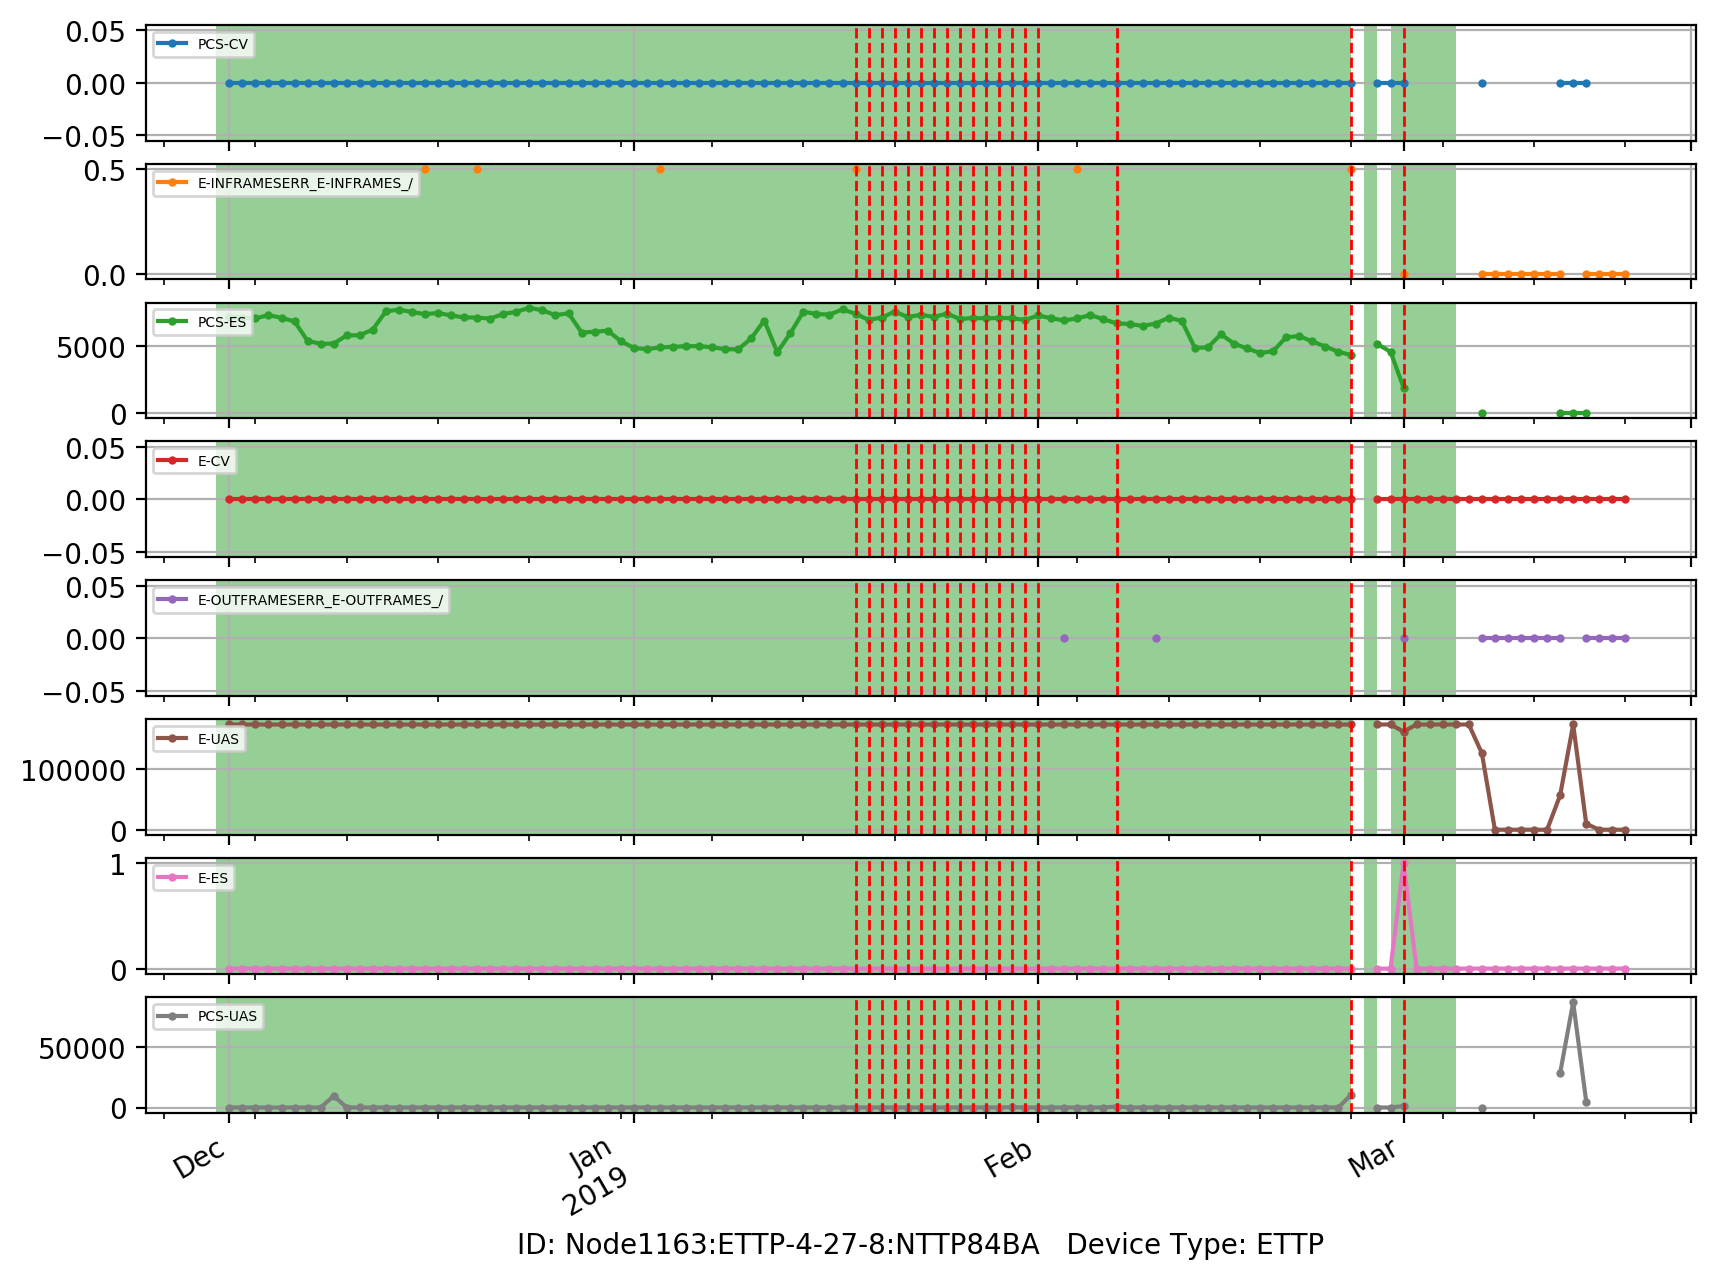

In [8]:
# example 2ssss
plot_per_device(data, alarm_device_list[300])

In [6]:
# for all PM dataset, change the date range to
pd.date_range('20190222', end='20190919', freq='D')

DatetimeIndex(['2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
               '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
               '2019-03-02', '2019-03-03',
               ...
               '2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13',
               '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-17',
               '2019-09-18', '2019-09-19'],
              dtype='datetime64[ns]', length=210, freq='D')